## The numerical solution of one-dimensional symmetrical finite potential wells

吴玉章学院 黎子豪 2017141511057

In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


(1) In the even parity state, the equation to be solven is:$$k\cdot tan(\frac{ka}{2})=\beta$$
Let: $$\xi=\frac{ka}{2}, \eta=\frac{\beta a}{2}$$
The equation transforms to:$$\xi \cdot tan(\xi)=\eta$$
Where: $$\xi^2+\eta^2=\frac{mV_0a^2}{2\hbar^2}$$
(2) In the odd parity state, the equation to be solven is:$$k\cdot cot(\frac{ka}{2})=\beta$$
It can transforms to:$$-\xi \cdot cot(\xi)=\eta$$
Notice: only when $\frac{mV_0a^2}{2\hbar^2}\geq\pi^2/4$, there is minmal energy level of odd parity state. When we expect to find those two states, the part on the left side of the inequation should be large enough.

Hence I assume $V_0=50 eV, a = 1\times10^{-10}m$ and for a single electron: $m=9.10956\times10^{-31}kg, \hbar=1.055\times 10^{-34}J/s$.

In [2]:
V_0 = 50*1.6021766208*10**(-19)
a = 1e-10
m = 9.10956*10**(-31)
hbar = 1.055e-34

In [3]:
n = m*V_0*a**2/2/hbar**2

In [4]:
eta = linspace(0.0001,n**0.5-0.001,2000)
xi = linspace(0.0001,n**0.5-0.001,2000)

In [5]:
eta_1 = (n-xi**2)**0.5
eta_2 = xi*tan(xi)

In [6]:
err = eta_1-eta_2
err_abs = abs(err)
i = where(err_abs == min(err_abs))
eta_best_even = (eta_1[i]+eta_2[i])/2
xi_best_even = xi[i]

### The solution in the even parity state

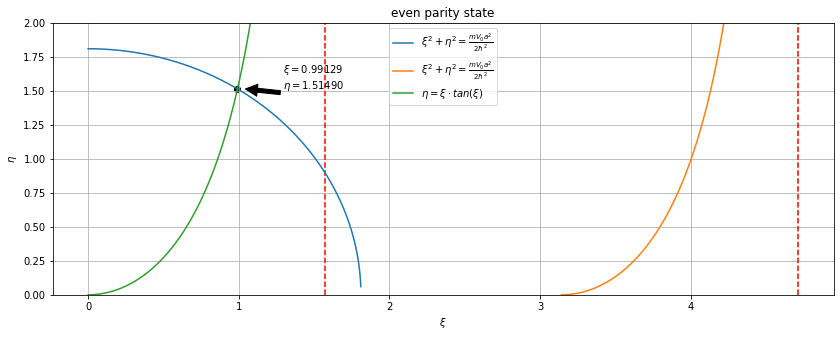

In [7]:
figure(figsize=(14,5))
plot(xi,eta_1, label = r'$\xi^2+\eta^2=\frac{mV_0a^2}{2\hbar^2}$')
plot(xi[:1600]+pi,eta_2[:1600], label = r'$\xi^2+\eta^2=\frac{mV_0a^2}{2\hbar^2}$')
plot(xi[:1600],eta_2[:1600], label = r'$\eta=\xi \cdot tan(\xi)$')
ylim(0,2)
title('even parity state')
vlines(pi/2,0,2, 'r', '--')
vlines(3*pi/2,0,2, 'r', '--')
xlabel(r'$\xi$')
ylabel(r'$\eta$')
legend(loc='upper center')
scatter(xi_best_even,eta_best_even, c='black')
annotate(r'$\xi=%.5f$'%xi_best_even+'\n'+r'$\eta=%.5f$'%eta_best_even, 
         xy=(xi_best_even+0.05,eta_best_even),xytext=(xi_best_even+0.3,eta_best_even), 
         arrowprops=dict(facecolor='black', shrink=0.01))
grid()
show()

### The solution in the odd parity state

In [8]:
xi_2 = linspace(0.0001,1.5*(n**0.5-0.001),3000)
eta_3 = -xi_2/tan(xi_2)

In [9]:
err = eta_1-eta_3[:2000]
err_abs = abs(err)
i = where(err_abs == min(err_abs))
eta_best_odd = (eta_1[i]+eta_3[i])/2
xi_best_odd = xi_2[i]

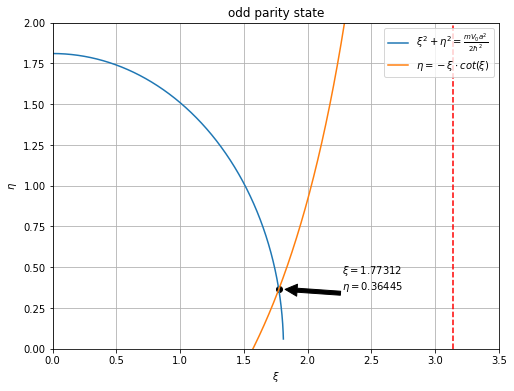

In [10]:
figure(figsize=(8,6))
plot(xi,eta_1, label = r'$\xi^2+\eta^2=\frac{mV_0a^2}{2\hbar^2}$')
plot(xi_2,eta_3, label = r'$\eta=-\xi \cdot cot(\xi)$')
vlines(pi,0,2,'r','--')
xlim(0,3.5)
ylim(0,2)
xlabel(r'$\xi$')
ylabel(r'$\eta$')
scatter(xi_best_odd,eta_best_odd,c='black')
annotate(r'$\xi=%.5f$'%xi_best_odd+'\n'+r'$\eta=%.5f$'%eta_best_odd, 
         xy=(xi_best_odd+0.05,eta_best_odd),xytext=(xi_best_odd+0.5,eta_best_odd), 
         arrowprops=dict(facecolor='black'))
title('odd parity state')
legend()
grid()
show()

We have got the solutions, and let's plot them!

In [11]:
beta_even = 2*eta_best_even/a
k_even = 2*xi_best_even/a

In [12]:
x_1 = linspace(-1.5*a,-a/2,100)
x_2 = linspace(-a/2,a/2,100)
x_3 = linspace(a/2,1.5*a,100)

In [13]:
A = cos(k_even*(a/2))/e**(-beta_even*(a/2))
B = cos(k_even*(-a/2))/e**(beta_even*(-a/2))

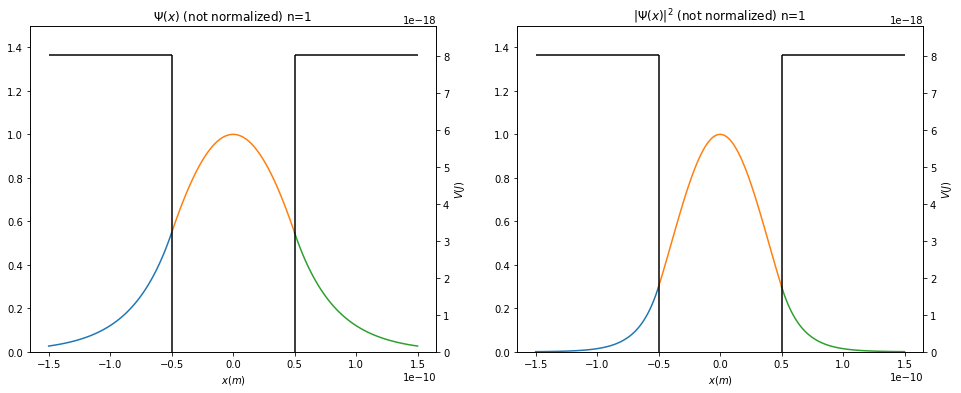

In [14]:
fig = figure(figsize = (16,6))

ax1 = fig.add_subplot(121)
ax1.plot(x_1,A*e**(beta_even*x_1))
ax1.plot(x_2,cos(k_even*x_2))
ax1.plot(x_3,B*e**(-beta_even*x_3))
ax1.set_ylim(0,1.5)
ax1.set_xlabel('$x(m)$')
ax1.set_title(r'$\Psi(x)$ (not normalized) n=1')

ax2 = ax1.twinx()
ax2.vlines(a/2, 0, V_0)
ax2.vlines(-a/2, 0, V_0)
ax2.hlines(V_0, -1.5*a, -a/2)
ax2.hlines(V_0, a/2, 1.5*a)
ax2.set_ylim([0, 1.1*V_0])
ax2.set_ylabel('$V(J)$')

ax3 = ax1 = fig.add_subplot(122)
ax3.plot(x_1,(B*e**(beta_even*x_1))**2)
ax3.plot(x_2,(cos(k_even*x_2))**2)
ax3.plot(x_3,(A*e**(-beta_even*x_3))**2)
ax3.set_ylim(0, 1.5)
ax3.set_title(r'$\vert\Psi(x)\vert^2$ (not normalized) n=1')
ax3.set_xlabel('$x(m)$')

ax4 = ax3.twinx()
ax4.vlines(a/2, 0, V_0)
ax4.vlines(-a/2, 0, V_0)
ax4.hlines(V_0, -1.5*a, -a/2)
ax4.hlines(V_0, a/2, 1.5*a)
ax4.set_ylim([0, 1.1*V_0])
ax4.set_ylabel('$V(J)$')
show()
show()

In [15]:
beta_odd = 2*eta_best_odd/a
k_odd = 2*xi_best_odd/a

In [16]:
A = sin(k_odd*(a/2))/e**(-beta_odd*(a/2))
B = sin(k_odd*(-a/2))/e**(beta_odd*(-a/2))

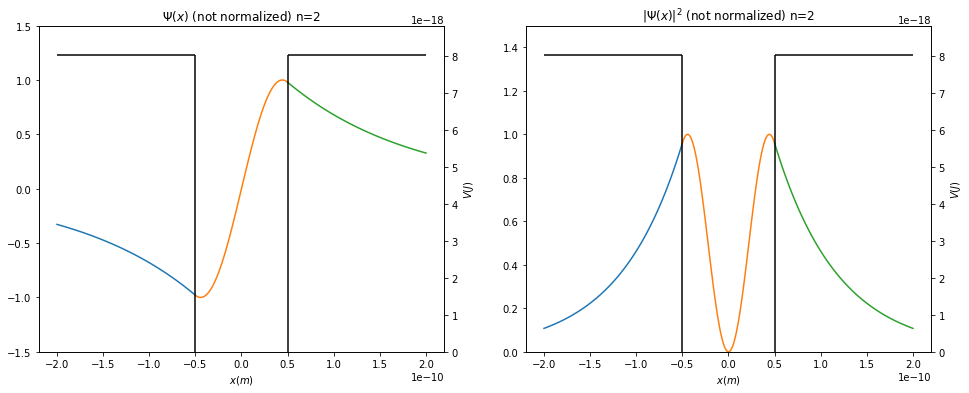

In [17]:
x_1 = linspace(-2*a,-a/2,100)
x_2 = linspace(-a/2,a/2,100)
x_3 = linspace(a/2,2*a,100)

fig = figure(figsize = (16,6))

ax1 = fig.add_subplot(121)
ax1.plot(x_1,B*e**(beta_odd*x_1))
ax1.plot(x_2,sin(k_odd*x_2))
ax1.plot(x_3,A*e**(-beta_odd*x_3))

ax1.set_ylim(-1.5,1.5)
# ax1.set_ylabel()
ax1.set_xlabel('$x(m)$')
ax1.set_title('$\Psi(x)$ (not normalized) n=2')

ax2 = ax1.twinx()
ax2.vlines(a/2, 0, V_0)
ax2.vlines(-a/2, 0, V_0)
ax2.hlines(V_0, -2*a, -a/2)
ax2.hlines(V_0, a/2, 2*a)
ax2.set_ylim([0, 1.1*V_0])
ax2.set_ylabel('$V(J)$')

ax3 = ax1 = fig.add_subplot(122)
ax3.plot(x_1,(B*e**(beta_odd*x_1))**2)
ax3.plot(x_2,(sin(k_odd*x_2))**2)
ax3.plot(x_3,(A*e**(-beta_odd*x_3))**2)
ax3.set_ylim(0, 1.5)
ax3.set_title(r'$\vert\Psi(x)\vert^2$ (not normalized) n=2')
ax3.set_xlabel('$x(m)$')

ax4 = ax3.twinx()
ax4.vlines(a/2, 0, V_0)
ax4.vlines(-a/2, 0, V_0)
ax4.hlines(V_0, -2*a, -a/2)
ax4.hlines(V_0, a/2, 2*a)
ax4.set_ylim([0, 1.1*V_0])
ax4.set_ylabel('$V(J)$')
show()